In [380]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [381]:
scores_df=pd.read_csv("test_data.csv")

In [379]:
#Top Ten Run Getters
scores_df.sort_values("Runs", ascending = False,inplace=True)
temp_df=scores_df.iloc[:10,:17].copy()
temp_df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,50+,BF_MEAN
0,SPD Smith (AUS),2014-2019,48,86,12,5612,239,75.83,9734,57.65,22,21,2,622,25,43,113.186047
1,JE Root (ENG),2015-2019,64,119,6,5311,254,47.00,9125,58.20,11,38,7,613,15,49,76.680672
2,V Kohli (INDIA),2014-2019,53,88,6,5211,254*,63.54,8556,60.90,20,13,5,563,15,33,97.227273
3,AN Cook (ENG),2015-2018,52,97,5,4049,263,44.01,8572,47.23,8,19,2,476,1,27,88.371134
4,DA Warner (AUS),2014-2019,49,91,2,3991,253,44.84,5361,74.44,13,18,7,484,28,31,58.912088
5,KS Williamson (NZ),2014-2019,40,68,9,3786,242*,64.16,6415,59.01,13,17,3,411,9,30,94.338235
6,CA Pujara (INDIA),2014-2019,49,80,4,3759,202,49.46,8378,44.86,12,17,6,432,11,29,104.725000
7,FDM Karunaratne (SL),2014-2019,49,96,2,3620,196,38.51,7535,48.04,9,19,11,342,5,28,78.489583
8,JM Bairstow (ENG),2015-2019,55,97,5,3427,167*,37.25,6060,56.55,6,17,9,398,21,23,62.474227
9,Azhar Ali (PAK),2014-2019,39,75,4,3364,302*,47.38,7815,43.04,10,16,6,294,13,26,104.200000


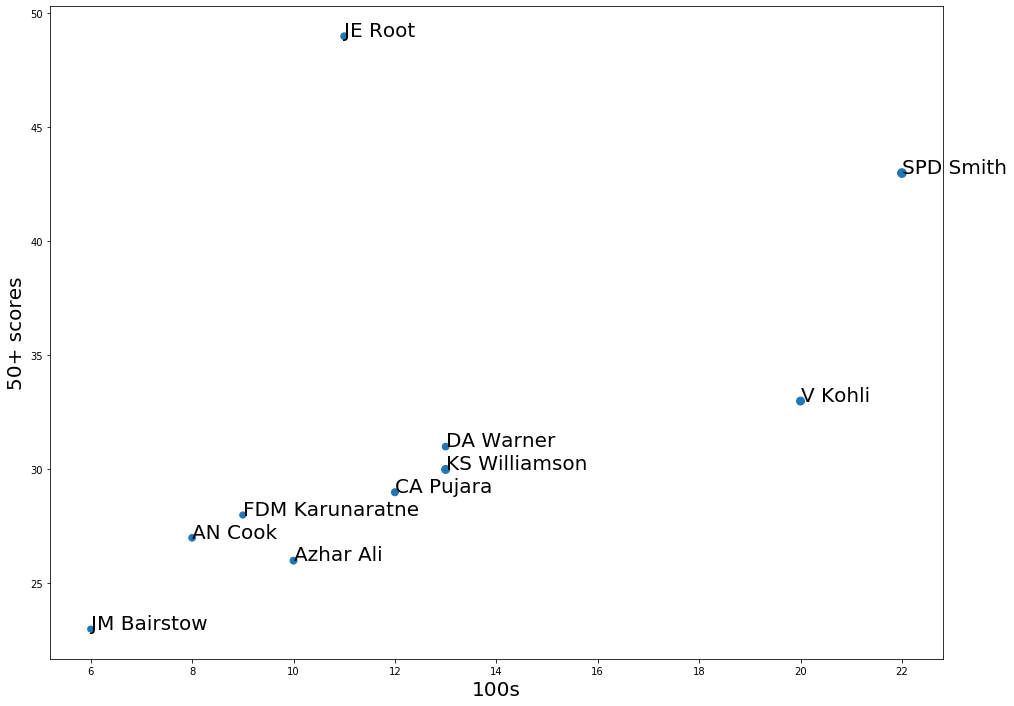

In [382]:
#50s to 100s Conversion Rates
fig,ax=plt.subplots(figsize=(16,12))
ax.scatter(temp_df['100'].values, temp_df['50+'].values, s=temp_df["Ave"].values)
plt.xlabel("100s",size=20)
plt.ylabel("50+ scores",size=20)
for i, row in temp_df.iterrows():
    ax.annotate(re.sub(r"([A-Za-z]+)\s?\([A-Z]+\)","\\1",row["Player"]),(row['100'],row['50+']),fontsize=20)

Text(0, 0.5, 'Scores')

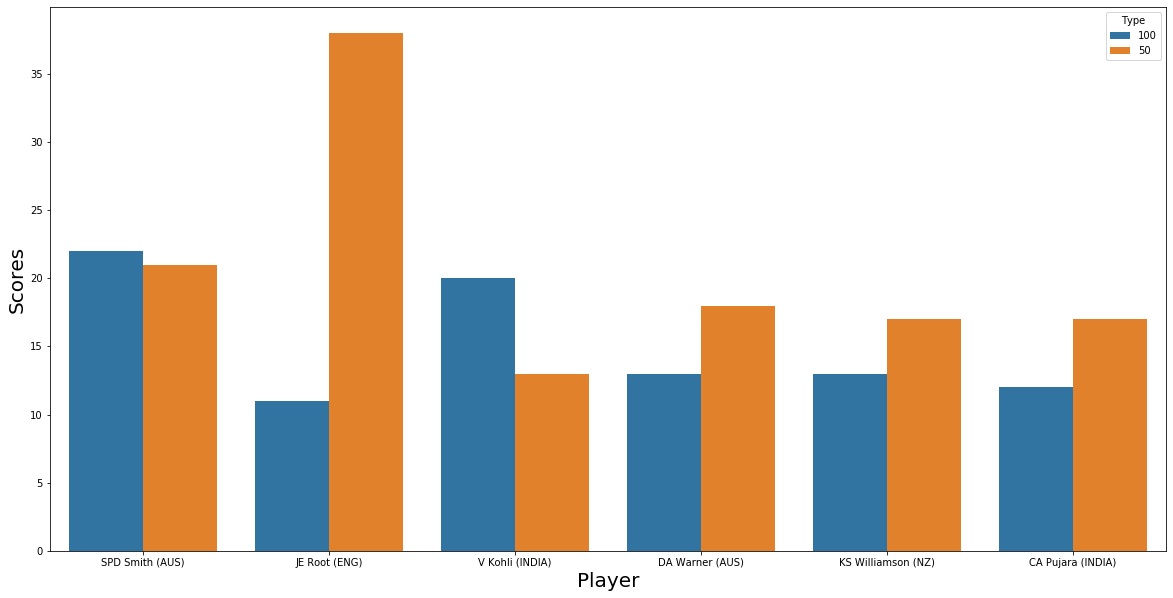

In [386]:
##50s to 100s Conversion Rates
df_conv['Count'] = df_conv['Count'].astype(np.float)
temp2_df = temp_df[temp_df['100'] > 10].copy()
df_conv=pd.melt(temp2_df,id_vars='Player',value_vars=['100','50'],var_name='Type',value_name='Count')
plt.figure(figsize=(20,10))
sns.barplot(x='Player',y='Count',hue='Type',data=df_conv)
plt.xlabel("Player",size=20)
plt.ylabel("Scores",size=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

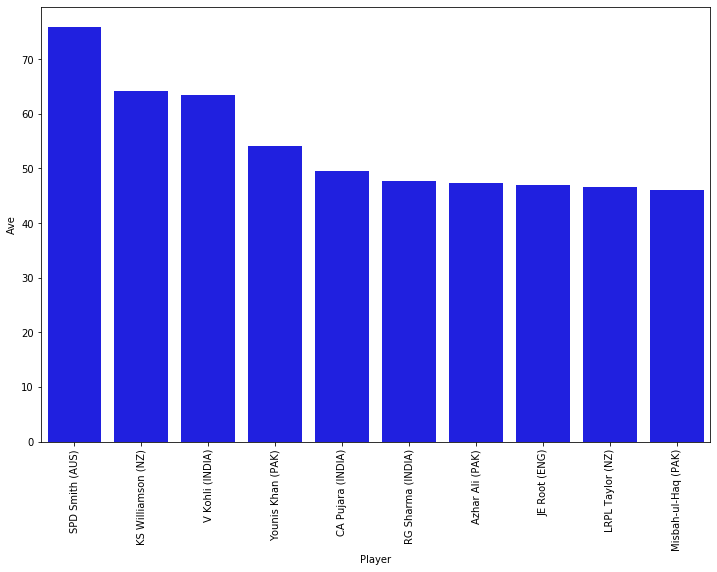

In [387]:
#Batting Averages
scores_df.sort_values("Ave", ascending = False,inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x=scores_df.Player[:10], y=scores_df.Ave[:10], color="blue")
plt.xticks(rotation=90)

Text(0, 0.5, 'Balls faced per innnings')

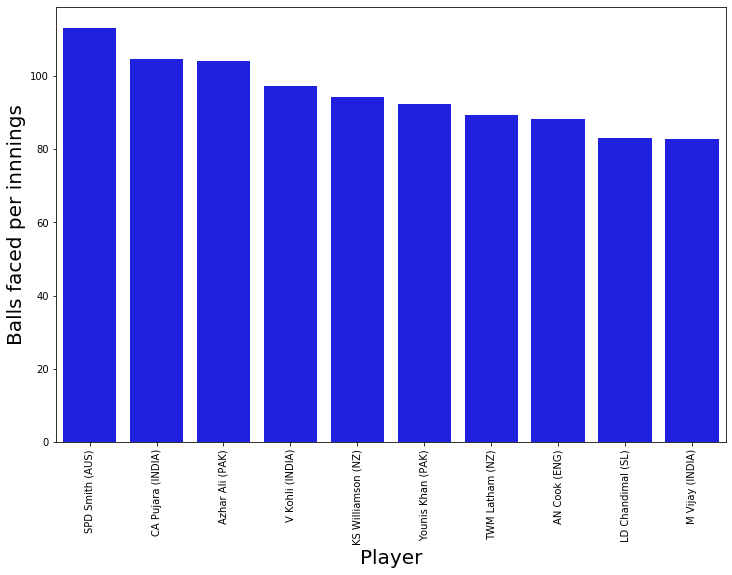

In [389]:
#Balls Faced per Innings
scores_df.sort_values("BF_MEAN", ascending = False,inplace=True)
plt.figure(figsize=(12,8))
plt.ylabel("Balls faced")
sns.barplot(x=scores_df.Player[:10], y=scores_df.BF_MEAN[:10], color="blue")
plt.xticks(rotation=90)
plt.xlabel("Player",size=20)
plt.ylabel("Balls faced per innnings",size=20)

In [214]:
scores_df2=pd.read_csv("test_data -HOME VS AWAY.csv")
scores_df2.head(4)
df=scores_df2.iloc[:4,:].copy()
df = pd.DataFrame(data=df,columns=["Player","Away_Avg","Home_Avg"])
df.head()



,Player,Away_Avg,Home_Avg
0,SPD Smith (AUS),96.44,65.90
1,JE Root (ENG),46.86,46.10
2,V Kohli (INDIA),77.66,54.04
3,KS Williamson (NZ),70.3,55.40


Text(0, 0.5, 'Player')

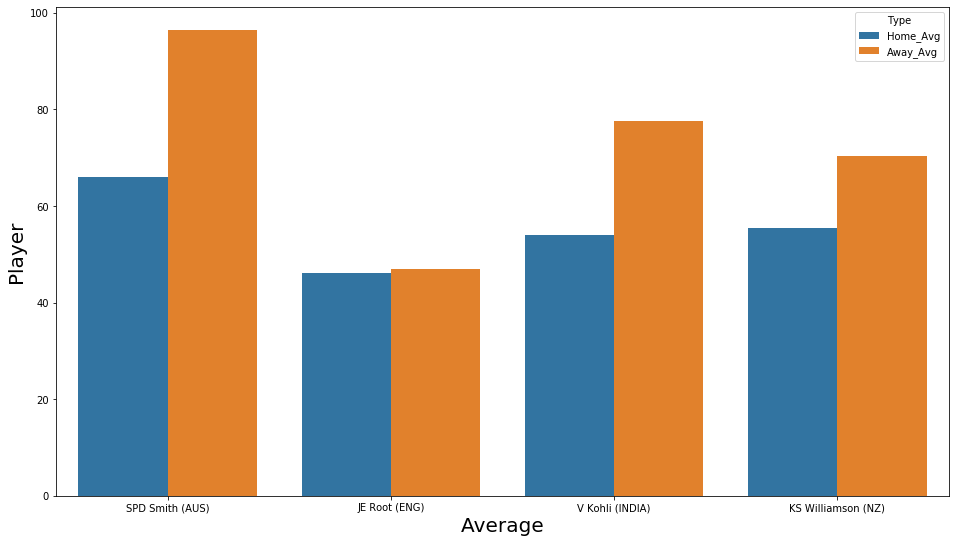

In [390]:
dfn=pd.melt(df,id_vars='Player',value_vars=['Home_Avg','Away_Avg'],var_name='Type',value_name='Avg')
dfn['Avg'] = dfn['Avg'].astype(np.float)
plt.figure(figsize=(16,9))
sns.barplot(x='Player',y='Avg',hue='Type',data=dfn)
plt.xlabel("Average",size=20)
plt.ylabel("Player",size=20)